# 1 Multiclass Classification

## 1.1 Dataset 

In [53]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import json
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

In [54]:
data_path = '/Users/Jonathan/Documents/Coursera/ML/machine-learning-ex3/ex3/'
fname = 'ex3data1.mat'

data = loadmat(data_path+fname)
data

{'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [55]:
X = np.matrix(data.get('X'))
y = data.get('y')

In [56]:
X.shape # 5000 training examples of 20x20 pixel grids

(5000, 400)

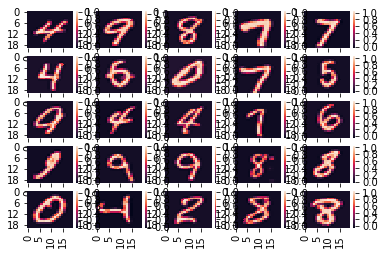

In [57]:
fig, axes = plt.subplots(5, 5)

for i in range(5):
    for j in range(5):
        sns.heatmap(X[np.random.randint(0, len(y)), :].reshape([20, 20], order='F'), ax=axes[i, j] )

In [60]:
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

4.5397868702434395e-05